[scipy.stats.gaussian_kde](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html)
[numpy.mgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mgrid.html)

In [1]:
%matplotlib inline

In [2]:
import scipy.stats as stats
import numpy as np; np.random.seed(1)
import matplotlib.pyplot as plt

In [3]:
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=(n,))
    m2 = np.random.normal(scale=0.5, size=(n,))
    return m1+m2, m1-m2

In [4]:
m1, m2 = measure(111)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

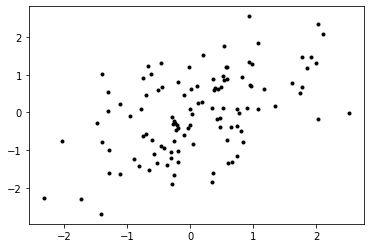

In [5]:
plt.plot(m1, m2, 'k.')
plt.show()

In [6]:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
print(X.shape, Y.shape) # (100, 100) (100, 100)
print(X.ravel().shape, Y.ravel().shape) # (10000,) (10000,)
print(positions.shape) # (2, 10000)

values = np.vstack([m1, m2]) 
kde = stats.gaussian_kde(values)
print(values.shape) # (2, 111)

pdf = kde(positions) # (10000,)
pdf = np.reshape(pdf, X.shape) # (100, 100)
pdf = np.rot90(pdf) # (100, 100)

(100, 100) (100, 100)
(10000,) (10000,)
(2, 10000)
(2, 111)


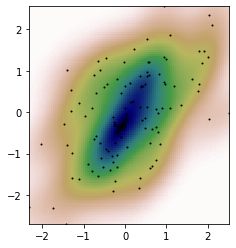

In [7]:
fig, ax = plt.subplots()
ax.imshow(pdf, cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()